In [43]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)

X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

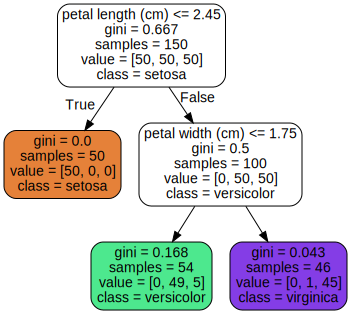

In [44]:
# Visualize the Decision Tree with export_graphviz() and graphviz.Source.from_file() to display
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(tree_clf, out_file="iris_tree.dot",
                feature_names=["petal length (cm)", "petal width (cm)"],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

Source.from_file("iris_tree.dot")

In [3]:
# Check the probabilities for each class
tree_clf.predict_proba([[5., 1.5]]).round(3), tree_clf.predict([[5, 1.5]])

(array([[0.   , 0.907, 0.093]]), array([1]))

In [16]:
# Training decision better with regularization
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf_n_r = DecisionTreeClassifier(random_state=42) # Not regularized
tree_clf_r = DecisionTreeClassifier(min_samples_leaf=5, random_state=42) # Regularized

tree_clf_n_r.fit(X_moons, y_moons)
tree_clf_r.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [17]:
X_moons_test, y_moons_test = make_moons(n_samples=100, noise=0.2, random_state=54)

tree_clf_n_r.score(X_moons_test, y_moons_test), tree_clf_r.score(X_moons_test, y_moons_test)

(0.82, 0.9)

In [35]:
# Let's train DecisionTreeRegressor on quadratic noisy dataset
import numpy as np
from sklearn.tree import DecisionTreeRegressor

X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

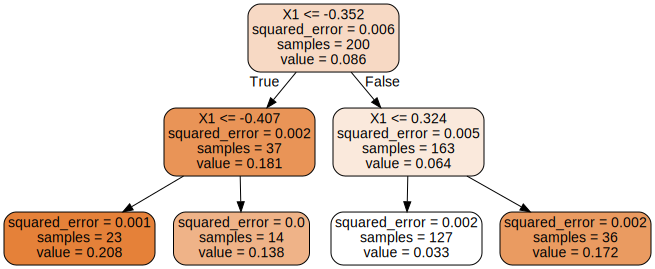

In [36]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(tree_reg, out_file="iris_tree.dot",
                feature_names=["X1"],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

Source.from_file("iris_tree.dot")

In [45]:
# Let's now scale the date and rotate it with PCA
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

# 7.

In [178]:
# Load make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [179]:
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier()

param_dis = {"max_leaf_nodes": [1, 2, 3, 4, 5, 10, 25]}

gr_s = GridSearchCV(dt_clf, param_dis, cv=3)

gr_s.fit(X_train, y_train.ravel())

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 21.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_pa

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [1, 2, 3, 4, 5, 10, 25]})

In [180]:
final_acc = gr_s.best_estimator_.score(X_test, y_test)

final_acc

0.854

# 8.

In [259]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.4)

splitter = ShuffleSplit(n_splits=1000)

X_train = []
y_train = []

for X, y in splitter.split(X):
  X_train.append(X)
  y_train.append(y)

In [224]:
from sklearn.base import clone

forest = [clone(gr_s.best_estimator_) for _ in range(1000)]
accuracy_scores = []

In [242]:
y_test[:100].reshape(1, -1).shape

(1, 100)

In [226]:
y_train[0].shape

(900,)

In [260]:
for tree, X_train, y_train in zip(forest, X_train, y_train):
  tree.fit(X_train.reshape(1, -1), y_train.reshape(1, -1))
  accuracy_score(y_test[:100].reshape(1, -1), tree.predict(X_test[:450].reshape(1, -1)))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass-multioutput targets

In [145]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits = n_trees, test_size = len(X_train) - n_instances, random_state = 42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

((900,), (100,))

In [152]:
dt_clf.predict(X_test1[0].reshape(1, -1))

array([[736,  34, 683,  89, 499, 824, 294, 944, 388, 330, 189, 537, 407,
         79, 721, 310, 821, 150, 333, 612, 738, 896, 365, 861, 396, 297,
        981, 154, 701, 201, 662, 588, 641, 219, 907, 760, 658, 993, 247,
        611, 790,  52, 153, 881, 781, 833, 421, 594, 591, 998, 273, 497,
        551, 734, 614, 645, 545, 284, 567, 931, 652, 405,  44, 925,  22,
        318, 221, 733, 967, 761, 444, 486, 813, 252, 623, 179, 778, 553,
        937, 234, 292, 783,  93, 525,  86, 202, 183, 515, 126, 108, 308,
        410, 182, 699, 111, 851, 476, 632, 555, 473]])

In [154]:
y_test1[0].reshape(1, -1)

array([[939, 573, 123, 835, 674, 661, 524,  81, 282, 937, 197, 861, 109,
         26, 706, 386, 816, 329, 711, 776, 533, 615, 948, 716, 906, 792,
        470, 944, 165, 457, 527,  71, 237,  97, 904, 490, 440, 852, 672,
        565, 474, 824, 658, 600, 535, 334, 228, 625, 454, 140, 867, 478,
        423, 417, 869, 121, 823, 671,  27, 315, 637, 209, 330, 523, 325,
         54, 502, 877, 659, 105, 567, 821, 602, 673, 650, 767, 216, 586,
        268, 682, 933, 946, 924, 495, 199, 152, 397, 376,  99, 479,  57,
         84, 519, 153, 598, 557, 353, 375, 729, 501]])